In [1]:
# Alex W
# 1003474

# 1a
# theta = [-2.51402919, -6.06354853]
# offset = 0
# accuracy = 0.9660678642714571

# 1b
# theta = [-2.05719114, -9.15769946]
# offset = 1
# accuracy = 0.9710578842315369

# 1c
# ensure plot_decision_boundary.py is present
# can run directly with vscode/python3
# python3 Q1.py

# if want graph to be plotted, change plot_boolean = True
# run in vscode with Jupyter kernel

#%%
plot_boolean = True


In [2]:
import pandas as pd
import numpy as np
from plot_decision_boundary import plot_decision_boundary_mesh_scatter

train = pd.read_csv("HW1_data/1/train_1_5.csv",
                    header=None,
                    names=['symmetry', 'intensity_average', 'label'],
                    dtype=np.float64)

train.head()


,symmetry,intensity_average,label
0,-0.725767,0.022763,1.0
1,-0.811273,0.035524,1.0
2,-0.763794,0.018471,1.0
3,-0.720302,0.056489,1.0
4,-0.315630,0.489584,-1.0


In [3]:
test = pd.read_csv("HW1_data/1/test_1_5.csv",
                   header=None,
                   names=['symmetry', 'intensity_average', 'label'],
                   dtype=np.float64)

test.head()
test_X = test.iloc[:, :-1]
test_X.insert(0, 'offset', np.ones(len(test)))
test_Y = test.iloc[:, -1:]


In [4]:

train_X = train.iloc[:, :-1]
train_X.insert(0, 'offset', np.ones(len(train)))
train_Y = train.iloc[:, -1:]

print(train)

print(train_X)
print(train_Y)


     symmetry  intensity_average  label
0   -0.725767           0.022763    1.0
1   -0.811273           0.035524    1.0
2   -0.763794           0.018471    1.0
3   -0.720302           0.056489    1.0
4   -0.315630           0.489584   -1.0
..        ...                ...    ...
978 -0.710613           0.131068    1.0
979 -0.456188           0.109599    1.0
980 -0.638576           0.060313    1.0
981 -0.504181           0.457274   -1.0
982 -0.582545           0.260452   -1.0

[983 rows x 3 columns]
     offset  symmetry  intensity_average
0       1.0 -0.725767           0.022763
1       1.0 -0.811273           0.035524
2       1.0 -0.763794           0.018471
3       1.0 -0.720302           0.056489
4       1.0 -0.315630           0.489584
..      ...       ...                ...
978     1.0 -0.710613           0.131068
979     1.0 -0.456188           0.109599
980     1.0 -0.638576           0.060313
981     1.0 -0.504181           0.457274
982     1.0 -0.582545           0.260452

[98

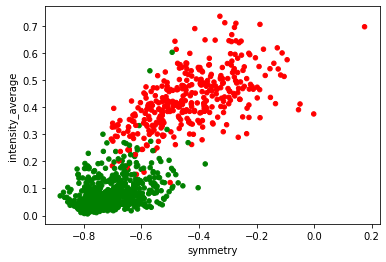

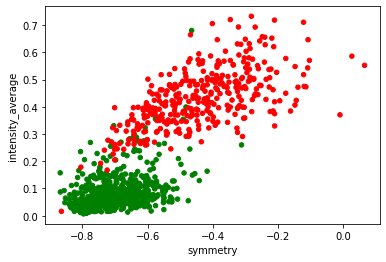

In [5]:
# -1 = red = 1
# 1 = green = 5
if plot_boolean:
    train.plot.scatter(
        'symmetry',
        'intensity_average',
        c=['green' if int(i) == 1 else 'red' for i in train_Y.values])
    test.plot.scatter(
        'symmetry',
        'intensity_average',
        c=['green' if int(i) == 1 else 'red' for i in test_Y.values])



In [6]:
def predict(theta, x):
    # h(x, theta)
    # takes in array x

    theta = np.mat(theta).T

    product = x * theta
    return [np.sign(i) for i in product]


def classify_prediction(y, theta, x):
    # y(theta*x)
    # if <=0, wrong prediction
    # if >0, right prediction
    h = 1 if x @ theta >= 0 else -1
    # print(h)

    return h == y


def calculate_training_error(theta, X, Y):
    error = 0
    for t in range(X.shape[0]):
        if not classify_prediction(Y[t], theta, X[t]):
            error += 1
    return error



step: 10


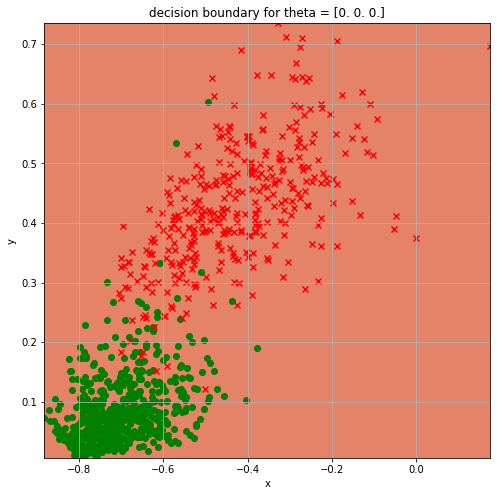

In [7]:
theta = np.zeros((train_X.shape[1]))

if plot_boolean:
    plot_decision_boundary_mesh_scatter(theta,
                                        train_X,
                                        train_Y,
                                        predict_function=predict,
                                        x_min=np.min(train_X.values[:, 1]),
                                        y_min=np.min(train_X.values[:, -1]),
                                        x_max=np.max(train_X.values[:, 1]),
                                        y_max=np.max(train_X.values[:, -1]),
                                        step=10)


In [8]:
theta = np.zeros((train_X.shape[1]))
print(
    f"initial training error: {calculate_training_error(theta, train_X.values, train_Y.values)/train_X.shape[0]}\n"
)


initial training error: 0.3672431332655137



In [9]:
t = 0  # training sample
k = 0
epoch = 5

theta = np.zeros((train_X.shape[1]))

for epoch in range(epoch):
    for t in range(train_X.shape[0]):
        # print(f'sample = {t}')
        if classify_prediction(train_Y.values[t % train_X.shape[0]], theta,
                               train_X.values[t % train_X.shape[0]]):
            pass
        else:
            # print(f'{theta} + {Y[t % X.shape[0]] * X[t % X.shape[0]]}')
            # print(f'{offset} + {sum(Y[t % X.shape[0]])}')
            theta = theta + train_Y.values[
                t % train_X.shape[0]] * train_X.values[t % train_X.shape[0]]

        t += 1

    print(f"epoch: {epoch}")
    print(f"theta: {theta}")
    # print(
    #     f"training error: {calculate_training_error(theta, train_X.values, train_Y.values) / train_X.shape[0]}"
    # )
    print(
        f"accuracy: {1-calculate_training_error(theta, test_X.values, test_Y.values) / test_X.shape[0]}"
    )

# sample output

# t = 0  # training sample...
# epoch: 0
# theta: [0. - 2.51402919 - 6.06354853]
# accuracy: 0.9660678642714571
# epoch: 1
# theta: [0. - 2.6151644 - 7.22348722]
# accuracy: 0.9650698602794411
# epoch: 2
# theta: [0. - 2.23439866 - 7.95339052]
# accuracy: 0.9510978043912176
# epoch: 3
# theta: [0. - 1.68899683 - 8.94830507]
# accuracy: 0.8932135728542914
# epoch: 4
# theta: [1. - 2.05719114 - 9.15769946]
# accuracy: 0.9710578842315369


epoch: 0
theta: [ 0.         -2.51402919 -6.06354853]
accuracy: 0.9660678642714571
epoch: 1
theta: [ 0.         -2.6151644  -7.22348722]
accuracy: 0.9650698602794411
epoch: 2
theta: [ 0.         -2.23439866 -7.95339052]
accuracy: 0.9510978043912176
epoch: 3
theta: [ 0.         -1.68899683 -8.94830507]
accuracy: 0.8932135728542914
epoch: 4
theta: [ 1.         -2.05719114 -9.15769946]
accuracy: 0.9710578842315369


step: 200


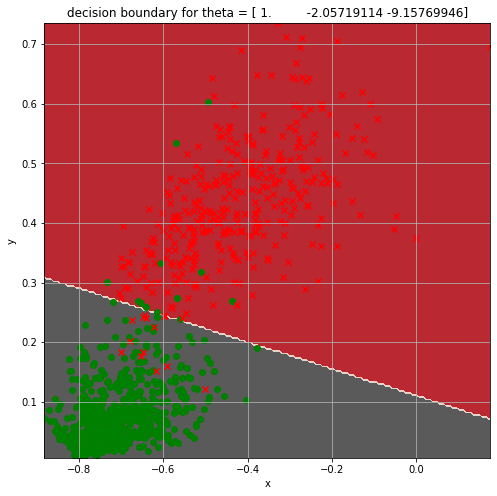

In [10]:
if plot_boolean:
    plot_decision_boundary_mesh_scatter(theta,
                                        train_X,
                                        train_Y,
                                        predict_function=predict,
                                        x_min=np.min(train_X.values[:, 1]),
                                        y_min=np.min(train_X.values[:, -1]),
                                        x_max=np.max(train_X.values[:, 1]),
                                        y_max=np.max(train_X.values[:, -1]),
                                        step=200)
